In [1]:
# pip install publib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
def sift_once(signal, t):
    # 최대값과 최소값을 찾기
    max_peaks = [j for j in range(1, len(signal)-1) if signal[j-1] < signal[j] > signal[j+1]]
    min_peaks = [j for j in range(1, len(signal)-1) if signal[j-1] > signal[j] < signal[j+1]]

    # 최대값과 최소값의 위치에 대해 cubic spline 보간
    if len(max_peaks) > 1 and len(min_peaks) > 1:
        upper_env = CubicSpline(t[max_peaks], signal[max_peaks])(t)
        lower_env = CubicSpline(t[min_peaks], signal[min_peaks])(t)
        
        # 평균 곡선 계산
        mean_env = (upper_env + lower_env) / 2
        
        # IMF 갱신
        imf = signal - mean_env
        
        return imf, upper_env, lower_env, mean_env
    else:
        return signal, np.zeros_like(signal), np.zeros_like(signal), np.zeros_like(signal)

In [3]:
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams.update({
    "text.usetex": True,
#    "font.family": "Helvetica"
})

In [4]:
# 초기 신호 설정
# 샘플링 주파수 및 시간 축 설정
fs = 1000
t = np.linspace(0, 1, 2 * fs, endpoint=False)

# 두 개의 주파수를 가진 신호 생성
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 25 * t)


### 이산형 신호

이산형 신호는 특정한 샘플링 주파수 $f_s$ 에서 샘플링된 신호를 의미합니다. 여기서는 $f_s = 1000$ Hz로 샘플링된 신호를 사용하고 있습니다.

$$ x[n] = \sin\left(2 \pi \cdot 5 \cdot \frac{n}{f_s}\right) + 0.5 \cdot \sin\left(2 \pi \cdot 25 \cdot \frac{n}{f_s}\right) $$

여기서:
- $n$ 은 샘플 인덱스 (정수)
- $f_s$ 는 샘플링 주파수 (1000 Hz)

### 연속형 신호

연속형 신호는 시간 $t$ 에 대한 신호를 의미합니다.

$$ x(t) = \sin(2 \pi \cdot 5 \cdot t) + 0.5 \cdot \sin(2 \pi \cdot 25 \cdot t) $$

여기서:
- $t$는 시간 (초 단위)

두 수식은 기본적으로 같은 신호를 나타내지만, 하나는 이산형(디지털) 신호를 나타내고 다른 하나는 연속형(아날로그) 신호를 나타냅니다.

# 체거름과정 시각화 

In [5]:
# # 두 개의 주파수를 가진 신호 생성
# signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 25 * t)

# residual = signal
# imfs = []
# imf, upper_env, lower_env, mean_env = sift_once(residual, t)
# imfs.append(imf)

# with PdfPages('sifting_process.pdf') as pdf:
#     plt.figure(figsize=(15, 10))
#     plt.subplot(3, 2, 1)
#     plt.plot(t, residual, 'b', label='Original Signal')
#     plt.plot(t, upper_env, 'orange', label='Upper Envelope',linestyle='dotted')
#     plt.plot(t, lower_env, 'orange', label='Lower Envelope',linestyle='dotted')
#     plt.plot(t, mean_env, 'r', label='Mean Envelope',linestyle='dashed')
#     plt.title(f"Sifting Process Iteration 1")
#     plt.xlabel("Time [s]")
#     plt.ylabel("Amplitude")
#     plt.legend()

#     plt.subplot(3, 2, 2)
#     plt.plot(t, imf, 'b', label='IMF')
#     plt.title(f"Intrinsic Mode Function 1")
#     plt.xlabel("Time [s]")
#     plt.ylabel("Amplitude")
#     plt.legend()

#     # 남은 신호 업데이트
#     residual -= imf
#     imf, upper_env, lower_env, mean_env = sift_once(residual, t)
#     imfs.append(imf)

#     plt.subplot(3, 2, 3)
#     plt.plot(t, residual, 'b', label='Residual')
#     plt.plot(t, upper_env, 'orange', label='Upper Envelope',linestyle='dotted')
#     plt.plot(t, lower_env, 'orange', label='Lower Envelope',linestyle='dotted')
#     plt.plot(t, mean_env, 'r', label='Mean Envelope',linestyle='dashed')
#     plt.title(r"Sifting Process Iteration 2")
#     plt.xlabel("Time [s]")
#     plt.ylabel("Amplitude")
#     plt.legend()

#     plt.subplot(3, 2, 4)
#     plt.plot(t, imf, 'b', label='IMF')
#     plt.title(f"Intrinsic Mode Function 2")
#     plt.xlabel("Time [s]")
#     plt.ylabel("Amplitude")
#     plt.legend()

#     # 남은 신호 업데이트
#     residual -= imf
#     imf, upper_env, lower_env, mean_env = sift_once(residual, t)
#     imfs.append(imf)


#     plt.subplot(3, 2, 5)
#     plt.plot(t, residual, 'b', label='Residual')
#     # plt.plot(t, upper_env, 'r', label='Upper Envelope',alpha=0.5,linestyle='dotted')
#     # plt.plot(t, lower_env, 'g', label='Lower Envelope',alpha=0.5,linestyle='dotted')
#     # plt.plot(t, mean_env, 'orange', label='Mean Envelope',linestyle='dashed')
#     plt.title(f"Sifting Process Iteration 3")
#     plt.xlabel("Time [s]")
#     plt.ylabel("Amplitude")
#     plt.legend()

#     # plt.subplot(3, 2, 6)
#     # plt.plot(t, imf, 'b', label='IMF')
#     # plt.title(f"Intrinsic Mode Function 3")
#     # plt.xlabel("Time [s]")
#     # plt.ylabel("Amplitude")
#     # plt.legend()

#     plt.tight_layout()
#     pdf.savefig(dpi=300)
#     plt.close()

In [6]:
# 두 개의 주파수를 가진 신호 생성
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 25 * t)

residual = signal
imfs = []
imf, upper_env, lower_env, mean_env = sift_once(residual, t)
imfs.append(imf)

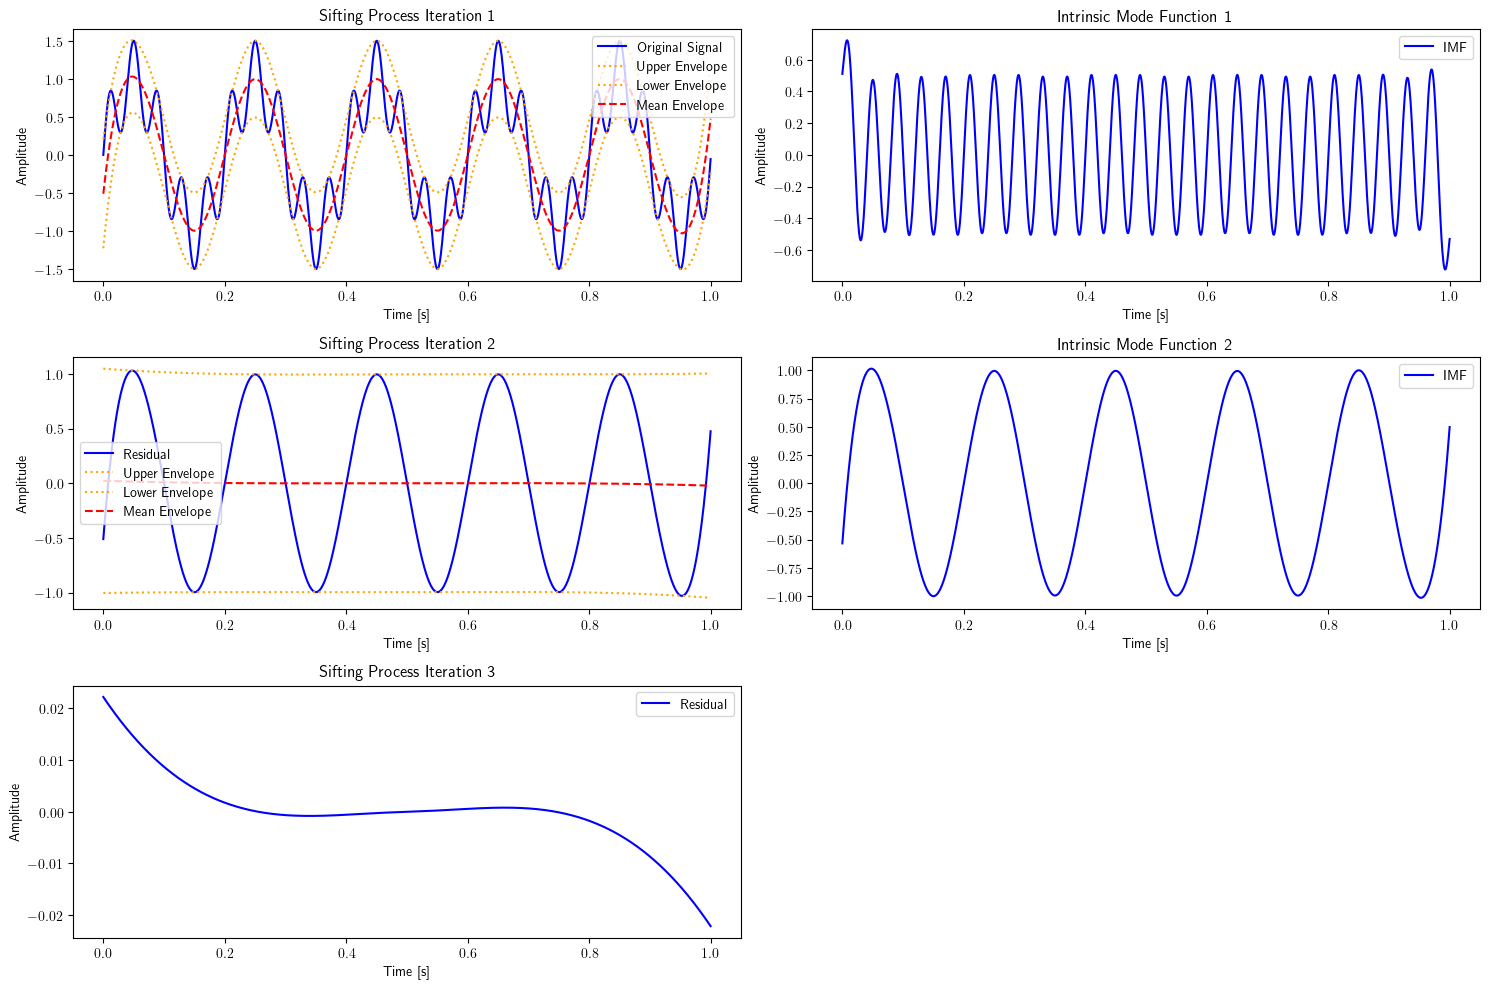

In [7]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.plot(t, residual, 'b', label='Original Signal')
plt.plot(t, upper_env, 'orange', label='Upper Envelope',linestyle='dotted')
plt.plot(t, lower_env, 'orange', label='Lower Envelope',linestyle='dotted')
plt.plot(t, mean_env, 'r', label='Mean Envelope',linestyle='dashed')
plt.title(f"Sifting Process Iteration 1")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(t, imf, 'b', label='IMF')
plt.title(f"Intrinsic Mode Function 1")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

# 남은 신호 업데이트
residual -= imf
imf, upper_env, lower_env, mean_env = sift_once(residual, t)
imfs.append(imf)

plt.subplot(3, 2, 3)
plt.plot(t, residual, 'b', label='Residual')
plt.plot(t, upper_env, 'orange', label='Upper Envelope',linestyle='dotted')
plt.plot(t, lower_env, 'orange', label='Lower Envelope',linestyle='dotted')
plt.plot(t, mean_env, 'r', label='Mean Envelope',linestyle='dashed')
plt.title(r"Sifting Process Iteration 2")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(t, imf, 'b', label='IMF')
plt.title(f"Intrinsic Mode Function 2")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

# 남은 신호 업데이트
residual -= imf
imf, upper_env, lower_env, mean_env = sift_once(residual, t)
imfs.append(imf)


plt.subplot(3, 2, 5)
plt.plot(t, residual, 'b', label='Residual')
plt.title(f"Sifting Process Iteration 3")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
fig = plt.gcf()

In [8]:
with PdfPages('sifting_process.pdf') as pdf:
    pdf.savefig(fig, dpi=300)
    plt.close(fig)